# Landcover Classification

* **Products used:** 
[io_lulc](https://explorer.digitalearth.africa/products/io_lulc), [esa_worldcover](https://explorer.digitalearth.africa/products/esa_worldcover)

## Background

**L**and **U**se/**L**and **C**over (LULC) maps classify land into broad categories such as water, crops, or built area. They are useful for visualising the dominant land uses in a given area. The total area or proportion of different classes can also be calculated for a specified area.

Many organisations publish LULC maps. Both the [The Environmental Systems Research Institute (Esri)](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac) and [European Space Agency (ESA)](https://esa-worldcover.org/en) products are available on the Digital Earth Africa Platform. Both of these product are derived from ESA Sentinel imagery and available at 10 m resolution over the entire African continent.

The accuracy of landcover maps changes with  location and class, so its important to understand the quality of the maps. ESRI publishes information on the accuracy of the LULC product, which is neatly summarised in the confusion matrix presented below. Confusion matrices show actual classes (from a validation dataset) in rows and predicted classes in columns. For example, the matrix below indicates that for 2020, the LULC product predicts 4,275,518 units of water that are actually water, and classes 1,614 units as water that are actually grass. Confusion matrices give an indication of how accruately each class is represented in the LULC product. Keep in mind that the following confiusion matrix is for the globe, and not specific to Africa.

<img align="middle" src="../Supplementary_data/LULC_Landcover_Classification/ESRI_LULC_ConMat.PNG">

ESA's WorldCover product comes with an in-depth report on the quality of the product, which we will not reproduce here. However, the full product validation report can be found using the following link: https://esa-worldcover.org/en/data-access. The overall accuracy for Africa is 73.6 %

**Important details:**

* Datacube product name: `io_lulc`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `10`.
        * `0`: `no data`
        * `1`: `water`
        * `2`: `trees`
        * `3`: `grass`
        * `4`: `flooded vegetation`
        * `5`: `crops`
        * `6`: `scrub/shrub`
        * `7`: `built area`
        * `8`: `bare ground`
        * `9`: `snow/ice`
        * `10`: `clouds` - this category indicates that no land cover information is available due to persistent cloud cover.
    * Date-range: 2020
    * Spatial resolution: 10m 


* Datacube product name: `esa_worldcover`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `100`.
        * `0`: `no data`
        * `10`: `tree cover`
        * `20`: `shrubland`
        * `30`: `grassland`
        * `40`: `cropland`
        * `50`: `built up`
        * `60`: `bare/sparse vegetation`
        * `70`: `snow and ice`
        * `80`: `permanent water bodies`
        * `90`: `herbaceous wetland`
        * `95`: `mangroves`
        * `100`: `moss and lichen`
    * Date-range: 2020
    * Spatial resolution: 10m 

## Description

In this notebook we will load LULC data using `dc.load()` to return a map of land use and land cover classes for a specified area.

Topics covered include:
1. Inspecting the LULC product available in the datacube
2. Using the `dc.load()` function to load in LULC data
3. Plotting LULC using the `plot_lulc()` function
4. An example analysis of the area of LULC classes in a given area

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline

import datacube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from deafrica_tools.plotting import display_map, plot_lulc

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Landcover_Classification")

### List measurements

We can inspect the data available for LULC using datacube's `list_measurements` functionality. The table below lists the products and measurements available for the two LULC datasets indexed within DE Africa's datacube. We can see that the product contains one layer named 'classification'. The datatype is integer, which corresponds to a LULC class.

In [3]:
product_name = ['io_lulc', 'esa_worldcover'] 

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
io_lulc,data,data,uint8,1,0.0,[classification]
esa_worldcover,classification,classification,uint8,1,0.0,NaN


### Analysis parameters

This section defines the analysis parameters, including:

* `lat, lon, buffer`: center lat/lon and analysis window size for the area of interest
* `resolution`: the pixel resolution to use for loading the LULC dataset. The native resolution of the product is 10 metres i.e. `(-10,10)`
* `measurements`: the 'band' or measurement to load from the product, we can use the native measurement names of one of the aliases

The default location is Madagascar

In [4]:
lat, lon = -19.4557, 46.4644

buffer = 5.0

resolution=(-500, 500) #resample so we can view a large area

measurements='classification'

#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

## Load the two LULC datasets

First, we'll load the ESRI Landcover Classification

In [5]:
#create reusable datacube query object
query = {
    'time': ('2020'),
    'x': lons,
    'y': lats,
    'resolution':resolution,
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the data
ds_esri = dc.load(product='io_lulc', **query).squeeze()

print(ds_esri)

/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


<xarray.Dataset>
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 2020-07-02
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


Now we can load the `esa_worldcover` product over the same region

In [6]:
ds_esa = dc.load(product='esa_worldcover', like=ds_esri.geobox).squeeze()

print(ds_esa)

<xarray.Dataset>
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 2020-07-01T12:00:00
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


## Plotting data

We can plot LULC for Madagascar and add a legend which corresponds to the classes using the DE Africa wrapper function `plot_lulc`. We can see that trees dominate the eastern areas of the island, while scrub/shrub is more prevalent on the western side. We can also identify a few cities/towns with the red 'built area' class.  You may also notice that the two different datasets don't always agree.

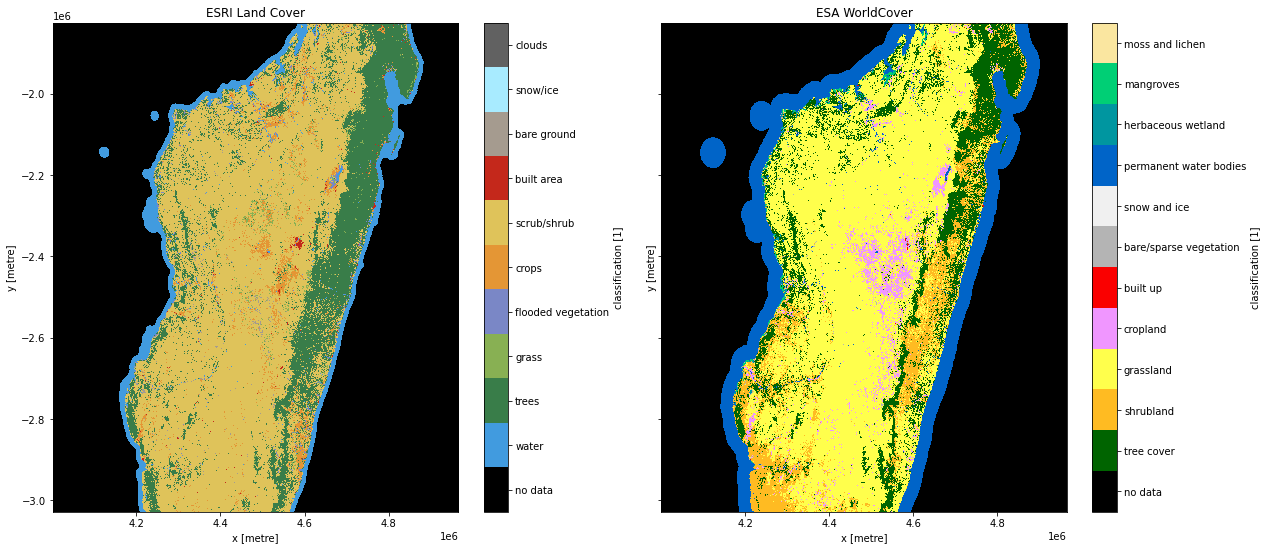

In [7]:
fig,ax = plt.subplots(1,2, figsize=(20,9), sharey=True)
plot_lulc(ds_esri[measurements], product='ESRI', legend=True, ax=ax[0])
plot_lulc(ds_esa[measurements], product='ESA', legend=True, ax=ax[1])
ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover');

## Example Analysis: Investigate the area of classes

In this example, we will look more closely at the city of Antananarivo, the capital of Madagascar, which can be seen in red in the map above.  We will load both LULC datasets, calculate the area of each class in each product, and compare the area of classes between the products.  As we are looking at a smaller area, we can load the LULC data in 10-m resolution.

First, let's set up some new parameters

In [8]:
lat, lon =  -18.9028, 47.5203
buffer = 0.05
resolution = (-10,10)
measuremnents='classification'

#add lat,lon,buffer to get bounding box
lon_range = (lon-buffer, lon+buffer)
lat_range =  (lat+buffer, lat-buffer)

### View selected location

In [ ]:
display_map(x=lon_range, y=lat_range)

### Load LULC data for Antananarivo

In [9]:
query = {
    'time': ('2020'),
    'x': lon_range,
    'y': lat_range,
    'resolution':resolution,
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the esri product
ds_esri = dc.load(product="io_lulc", **query).squeeze()

#load the esa product
ds_esa = dc.load(product="esa_worldcover", **query).squeeze()

/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


### Plot the two datasets

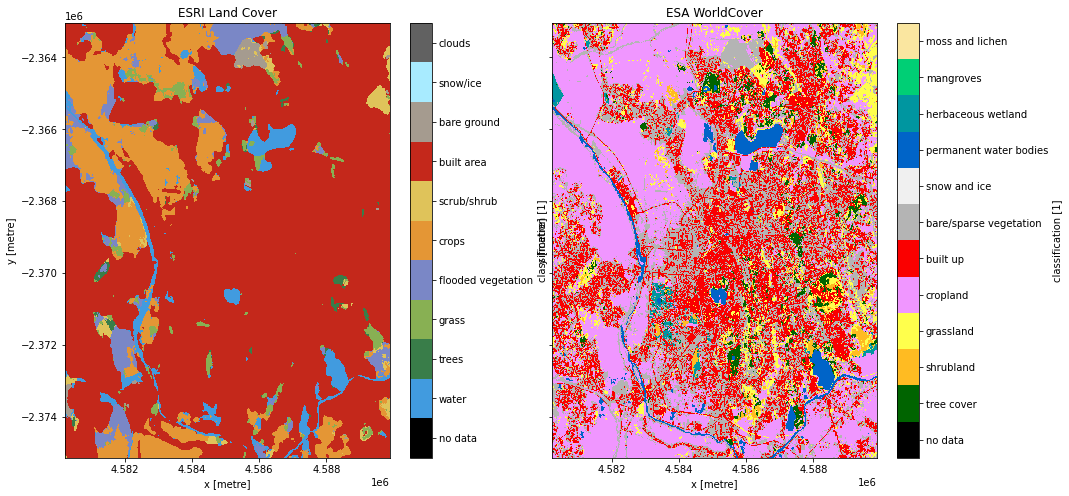

In [10]:
fig,ax = plt.subplots(1,2, figsize=(16,8), sharey=True)
plot_lulc(ds_esri[measurements], product='ESRI', legend=True, ax=ax[0])
plot_lulc(ds_esa[measurements], product='ESA', legend=True, ax=ax[1])
ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover');

### Calculate the area of each class

We can use the numpy `np.unique` function to return the pixel count for each class.

In [11]:
ds_esri_counts = np.unique(ds_esri[measurements].data, return_counts=True)
ds_esa_counts = np.unique(ds_esa[measurements].data, return_counts=True)

print(ds_esri_counts)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8), array([ 46974,   5722,  22671,  45365, 165491,  12638, 862342,   7657]))


We can see above that result is an array with classes 1:8 which corresponds to `water` through to `bareground`, and the count of pixels within these classes. Using the resolution we set in our data loading query, we can calculate the total area of each class in square kilometres and plot the results. Does the plot align with the proportions of class we can visualise in the map of Antananarivo?

For more information on area calculations see the water extent calculation section of the Digital Earth Africa Sandbox [training course](https://learn.digitalearthafrica.org/courses/course-v1:digitalearthafrica+DEA101+2021/course/).

In [12]:
pixel_length = query["resolution"][1]  # in metres, refers to resolution we defined above (-10,10) for Antananarivo
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2

#calculate the area of each class
ds_esri_area = np.array(ds_esri_counts[1] * area_per_pixel)
ds_esa_area = np.array(ds_esa_counts[1] * area_per_pixel)

### Plot the area of each class

In the plot below, are the proportions of classes similar between the products? What are the classes that typically show confusion?

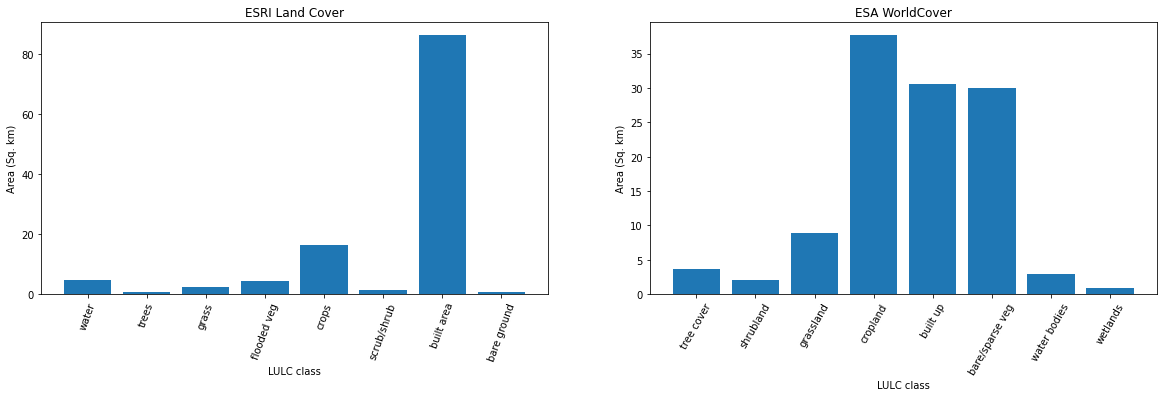

In [13]:
fig,ax=plt.subplots(1,2, figsize=(20,5))

#list of classes actually in the map
esri_classes = ['water', 'trees', 'grass', 'flooded veg', 'crops',
                'scrub/shrub', 'built area', 'bare ground']

esa_classes = ['tree cover', 'shrubland', 'grassland', 'cropland', 'built up',
               'bare/sparse veg', 'water bodies', 'wetlands',]

#plot esri
ax[0].bar(esri_classes, ds_esri_area)
ticks_loc = ax[0].get_xticks()
ax[0].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[0].set_xticklabels(esri_classes, rotation=70)
ax[0].set_xlabel("LULC class")
ax[0].set_ylabel("Area (Sq. km)")

#plot worldcover
ax[1].bar(esa_classes, ds_esa_area)
ticks_1 = ax[1].get_xticks()
ax[1].xaxis.set_major_locator(mticker.FixedLocator(ticks_1))
ax[1].set_xticklabels(esa_classes, rotation=60)
ax[1].set_xlabel("LULC class")
ax[1].set_ylabel("Area (Sq. km)")
ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover');

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [14]:
print(datacube.__version__)

1.8.6


**Last tested:**

In [ ]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')